<h2><b>EDA</b> PCOS Ejercicio</h2>

H: Las personas que hacen más ejercicio (frecuencia, duración, beneficio) tienen menos casos de PCOS

En esta sección se analiza la relación entre la actividad física y la presencia del Síndrome de Ovario Poliquístico (PCOS). La práctica regular de ejercicio desempeña un papel clave en el manejo del síndrome, ya que contribuye a mejorar la sensibilidad a la insulina, regular el ciclo menstrual y favorecer el bienestar general.

Con el fin de explorar posibles diferencias en los hábitos de ejercicio entre mujeres con y sin PCOS, se evaluaron tres variables principales: frecuencia, duración y beneficio percibido de la actividad física. Estas variables se codificaron mediante valores numéricos estandarizados para facilitar el análisis comparativo y la visualización de tendencias:

Frecuencia del ejercicio

0.00 → Nunca

0.25 → Rara vez

0.50 → 1–2 veces por semana

0.75 → 3–4 veces por semana

1.00 → Diario

Duración del ejercicio

0.00 → 0

0.25 → Menos de 30 minutos

0.50 → 30 minutos

0.75 → Más de 30 minutos

1.00 → 30 minutos – 1 hora

Beneficio percibido del ejercicio

0.00 → No mucho

0.50 → Algo / no del todo

1.00 → Sí, significativamente

Esta codificación permite cuantificar los hábitos de actividad física de forma homogénea, lo que facilita la comparación estadística entre grupos (PCOS = Sí / No) y el uso de gráficos y medidas descriptivas para detectar patrones o asociaciones entre el nivel de ejercicio y la incidencia del síndrome.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../data/pcos_ejercicio.csv')
df

,PCOS,Exercise Yes/No,Exercise_Frequency,Exercise_Type,Exercise_Duration,Exercise_Benefit
0,0.0,1,0.25,Cardio,30,0.5
1,0.0,1,1.00,No Exercise,1-29,0.5
2,0.0,1,0.25,Cardio,1-29,0.5
3,0.0,1,0.00,No Exercise,0,0.5
4,0.0,1,1.00,Cardio,60,0.5
...,...,...,...,...,...,...
168,0.0,1,0.25,Cardio,30,0.5
169,1.0,1,0.75,HIIT,30,0.5
170,1.0,1,0.25,Flexibility,0,0.0
171,0.0,1,0.25,Cardio,60,0.5


In [ ]:
#Convertimos a numérico
cols = ["Exercise_Frequency", "Exercise_Duration", "Exercise_Benefit", "PCOS"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

#Eliminamos filas vacías
df = df.dropna(subset=cols)

#Correlación entre ejercicio y PCOS
correlaciones = df[cols].corr()["PCOS"].sort_values()
print("Correlaciones con PCOS:")
print(correlaciones)

Correlaciones con PCOS:
Exercise_Duration    -0.001007
Exercise_Benefit      0.018801
Exercise_Frequency    0.042081
PCOS                  1.000000
Name: PCOS, dtype: float64


In [ ]:
freq_labels = {
    0.00: "Nunca",
    0.25: "Rara vez",
    0.50: "1–2 veces/sem",
    0.75: "3–4 veces/sem",
    1.00: "Diario"}

dur_labels = {
    0.00: "0",
    0.25: "<30 min",
    0.50: "30 min",
    0.75: ">30 min",
    1.00: "30 min–1 h"}

benefit_labels = {
    0.00: "No mucho",
    0.50: "Algo / no del todo",
    1.00: "Sí, significativamente"}

#Frecuencia de ejercicio
print("\nRelación entre FRECUENCIA de ejercicio y PCOS:\n")
temp = df.dropna(subset=["Exercise_Frequency"])
pcos_freq = temp.groupby("Exercise_Frequency")["PCOS"].mean() * 100

for nivel, valor in pcos_freq.round(2).items():
    etiqueta = freq_labels.get(round(nivel, 2), nivel)
    print(f"  {etiqueta}: {valor:.2f}% con PCOS")


#Duración del ejercicio
print("\nRelación entre DURACIÓN del ejercicio y PCOS:\n")
temp = df.dropna(subset=["Exercise_Duration"])
pcos_dur = temp.groupby("Exercise_Duration")["PCOS"].mean() * 100

for nivel, valor in pcos_dur.round(2).items():
    etiqueta = dur_labels.get(round(nivel, 2), nivel)
    print(f"  {etiqueta} minutos: {valor:.2f}% con PCOS")


#Beneficio percibido del ejercicio
print("\nRelación entre BENEFICIO del ejercicio y PCOS:\n")
temp = df.dropna(subset=["Exercise_Benefit"])
pcos_ben = temp.groupby("Exercise_Benefit")["PCOS"].mean() * 100

for nivel, valor in pcos_ben.round(2).items():
    etiqueta = benefit_labels.get(round(nivel, 2), nivel)
    print(f"  {etiqueta}: {valor:.2f}% con PCOS")


Relación entre FRECUENCIA de ejercicio y PCOS:

  Nunca: 24.00% con PCOS
  Rara vez: 21.57% con PCOS
  3–4 veces/sem: 25.00% con PCOS
  Diario: 30.00% con PCOS

Relación entre DURACIÓN del ejercicio y PCOS:

  0 minutos: 23.08% con PCOS
  30.0 minutos: 26.32% con PCOS
  60.0 minutos: 21.43% con PCOS

Relación entre BENEFICIO del ejercicio y PCOS:

  No mucho: 42.86% con PCOS
  Algo / no del todo: 19.48% con PCOS
  Sí, significativamente: 35.71% con PCOS


In [6]:
promedios = df.groupby("PCOS")[["Exercise_Frequency", "Exercise_Duration", "Exercise_Benefit"]].mean().round(2)
print("Promedios de ejercicio por grupo de PCOS:")
print(promedios)

Promedios de ejercicio por grupo de PCOS:
      Exercise_Frequency  Exercise_Duration  Exercise_Benefit
PCOS                                                         
0.0                 0.32              14.40              0.53
1.0                 0.35              14.35              0.54


In [7]:
df["Freq_Group"] = pd.cut(df["Exercise_Frequency"], bins=[-0.1, 0.25, 0.5, 0.75, 1], labels=["Nunca", "Rara vez", "1-2/sem", "Frecuente"])

prob_por_grupo = df.groupby("Freq_Group")["PCOS"].mean().round(3)
print("Probabilidad de PCOS según frecuencia de ejercicio:")
print(prob_por_grupo)

Probabilidad de PCOS según frecuencia de ejercicio:
Freq_Group
Nunca        0.224
Rara vez       NaN
1-2/sem      0.250
Frecuente    0.300
Name: PCOS, dtype: float64


C:\Users\anear\AppData\Local\Temp\ipykernel_8428\3695803258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Freq_Group"] = pd.cut(df["Exercise_Frequency"], bins=[-0.1, 0.25, 0.5, 0.75, 1], labels=["Nunca", "Rara vez", "1-2/sem", "Frecuente"])
C:\Users\anear\AppData\Local\Temp\ipykernel_8428\3695803258.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_por_grupo = df.groupby("Freq_Group")["PCOS"].mean().round(3)


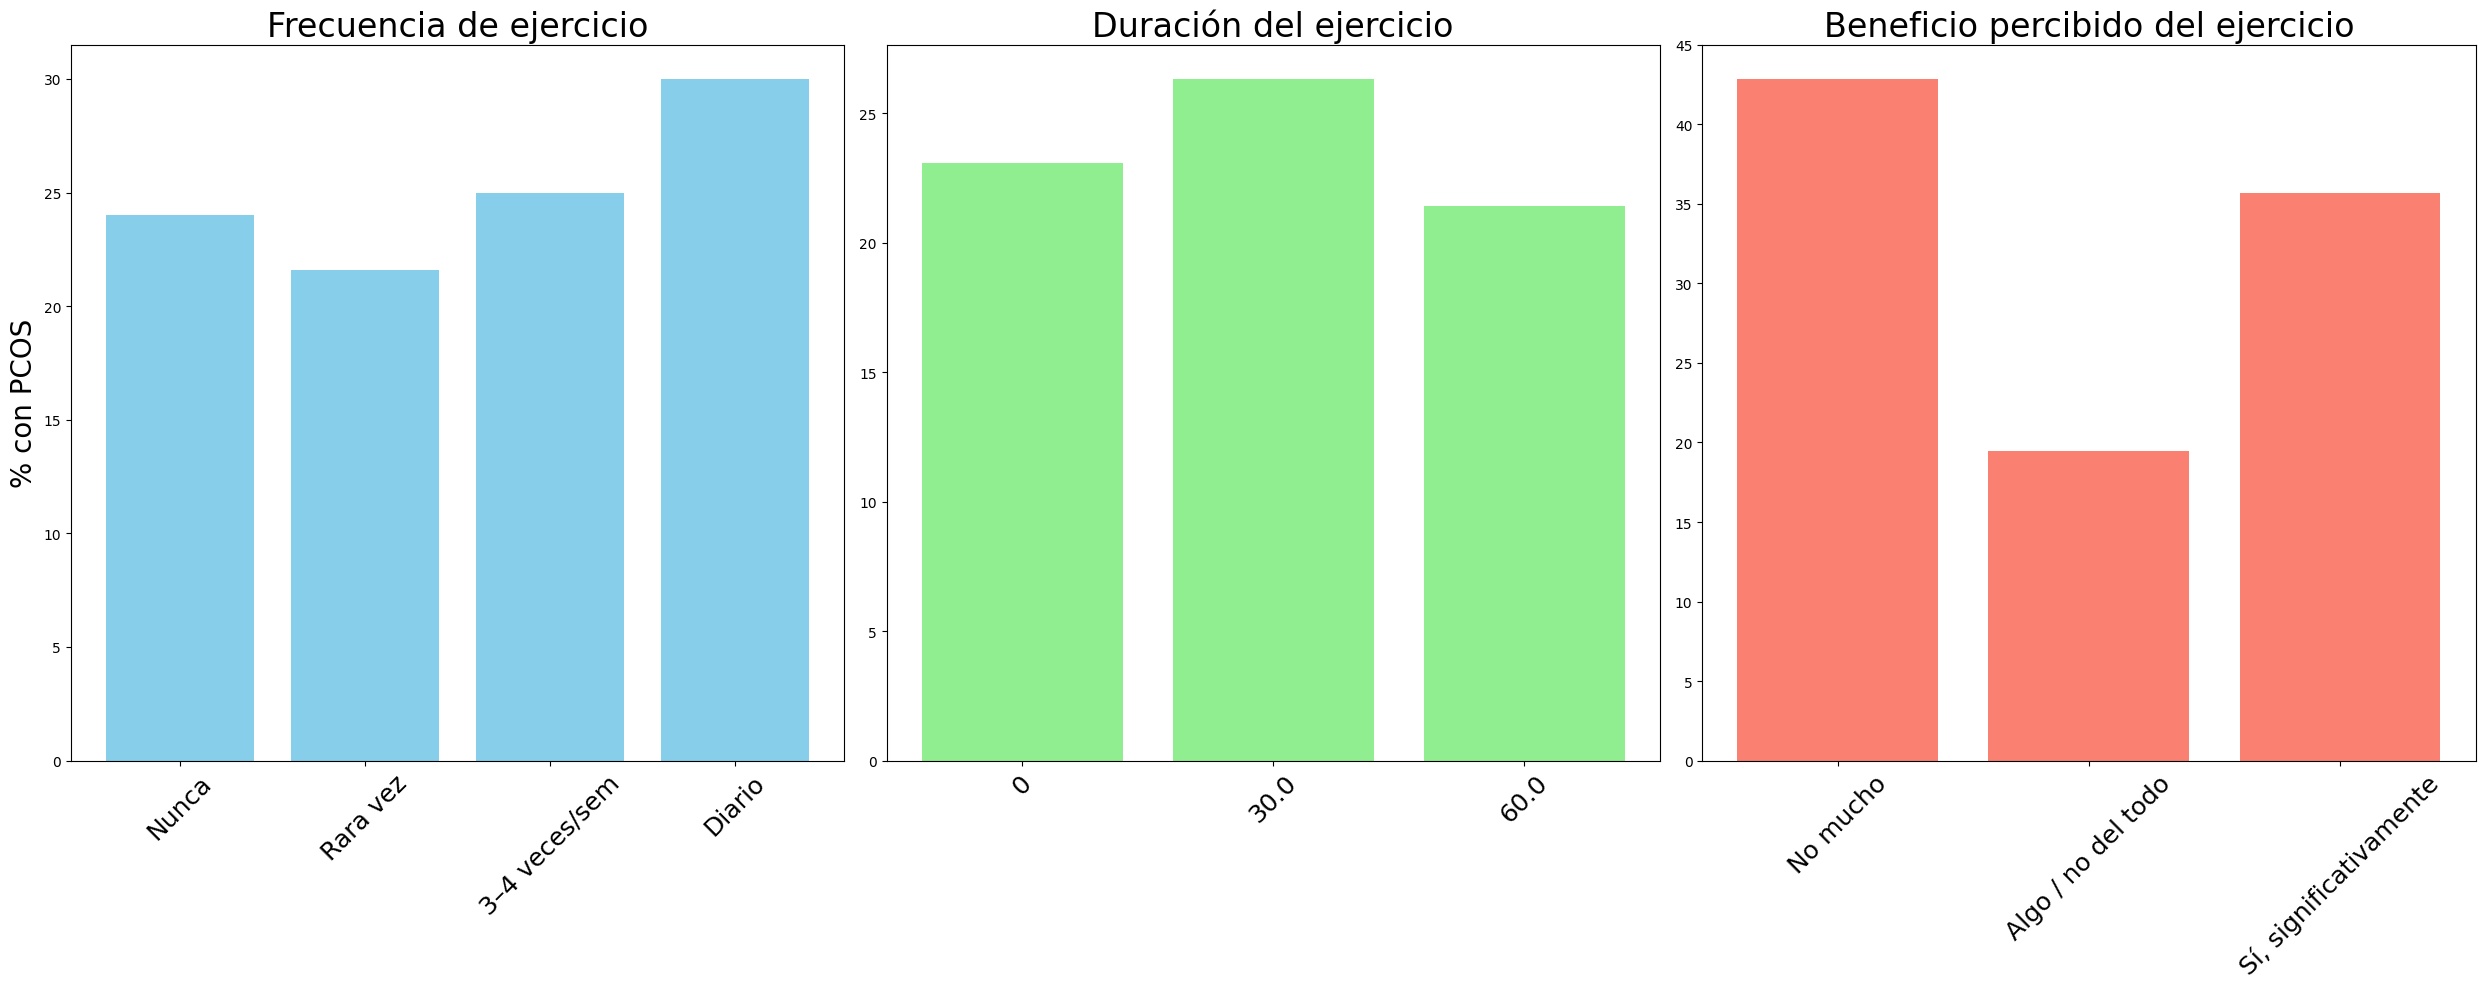

In [ ]:
#Gráfico barras
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

#Frecuencia
axes[0].bar(
    pcos_freq.index.map(lambda x: freq_labels.get(round(x,2), str(x))), 
    pcos_freq, 
    color='skyblue'
)
axes[0].set_title("Frecuencia de ejercicio", fontsize=24)
axes[0].set_ylabel("% con PCOS", fontsize=20)
axes[0].tick_params(axis='x', rotation=45, labelsize=18)  # etiquetas más grandes

#Duración
axes[1].bar(
    pcos_dur.index.map(lambda x: dur_labels.get(round(x,2), str(x))), 
    pcos_dur, 
    color='lightgreen'
)
axes[1].set_title("Duración del ejercicio", fontsize=24)
axes[1].tick_params(axis='x', rotation=45, labelsize=18)  # etiquetas más grandes

#Beneficio percibido
axes[2].bar(
    pcos_ben.index.map(lambda x: benefit_labels.get(round(x,2), str(x))), 
    pcos_ben, 
    color='salmon'
)
axes[2].set_title("Beneficio percibido del ejercicio", fontsize=24)
axes[2].tick_params(axis='x', rotation=45, labelsize=18)  # etiquetas más grandes

plt.tight_layout()
plt.show()

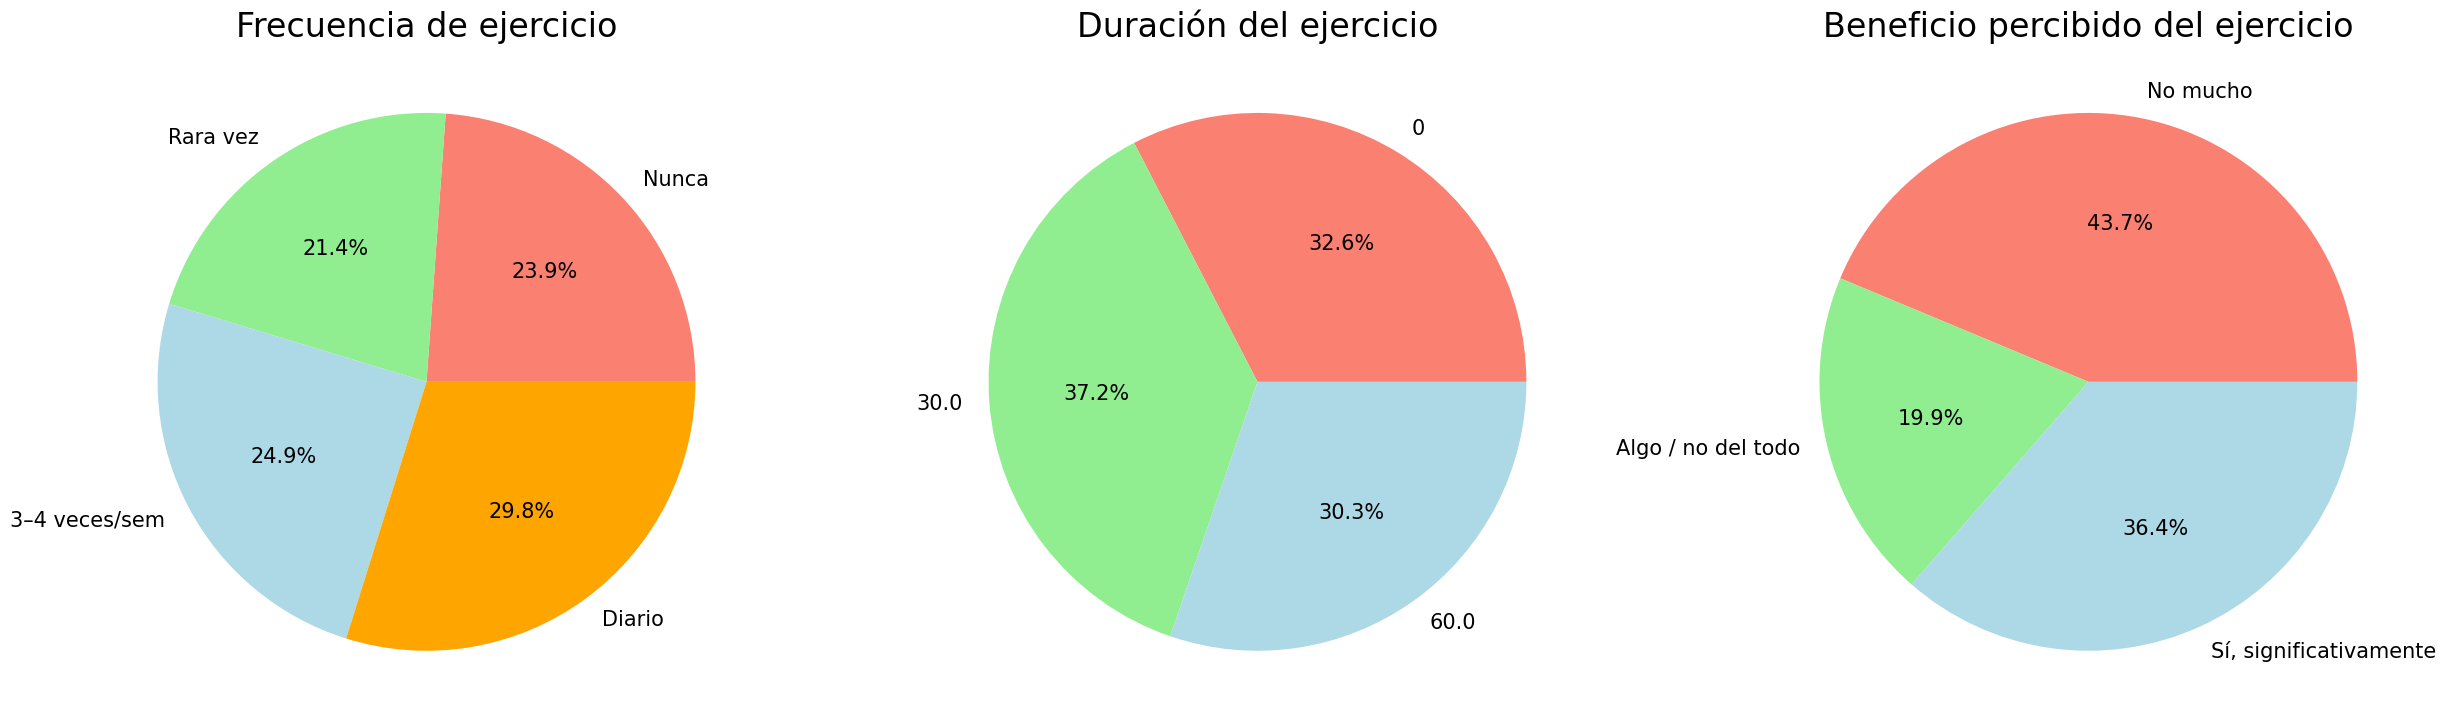

In [ ]:
mis_colores = ["salmon", "lightgreen", "lightblue", "orange", "violet"]

fig, axes = plt.subplots(1, 3, figsize=(25, 10))

#Frecuencia
axes[0].pie(
    pcos_freq.values,
    labels=pcos_freq.index.map(lambda x: freq_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_freq)]  # colores consistentes
)
axes[0].set_title("Frecuencia de ejercicio", fontsize=24)

#Duración
axes[1].pie(
    pcos_dur.values,
    labels=pcos_dur.index.map(lambda x: dur_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_dur)]
)
axes[1].set_title("Duración del ejercicio", fontsize=24)

#Beneficio percibido
axes[2].pie(
    pcos_ben.values,
    labels=pcos_ben.index.map(lambda x: benefit_labels.get(round(x,2), str(x))),
    autopct="%1.1f%%",
    textprops={'fontsize': 15},
    colors=mis_colores[:len(pcos_ben)]
)
axes[2].set_title("Beneficio percibido del ejercicio", fontsize=24)

plt.tight_layout()
plt.show()

In [68]:
#Crear DataFrames de % con y sin PCOS (como antes)
def get_percent(df, col, labels):
    df_temp = df.dropna(subset=[col])
    counts = df_temp.groupby(col)["PCOS"].value_counts(normalize=True).unstack(fill_value=0) * 100
    counts.index = [labels.get(round(x,2), str(x)) for x in counts.index]
    if 0 not in counts.columns:
        counts[0] = 0
    if 1 not in counts.columns:
        counts[1] = 0
    counts = counts[[0,1]]  # 0 = sin PCOS, 1 = con PCOS
    return counts

freq_df = get_percent(df, "Exercise_Frequency", freq_labels)
dur_df = get_percent(df, "Exercise_Duration", dur_labels)
ben_df = get_percent(df, "Exercise_Benefit", benefit_labels)

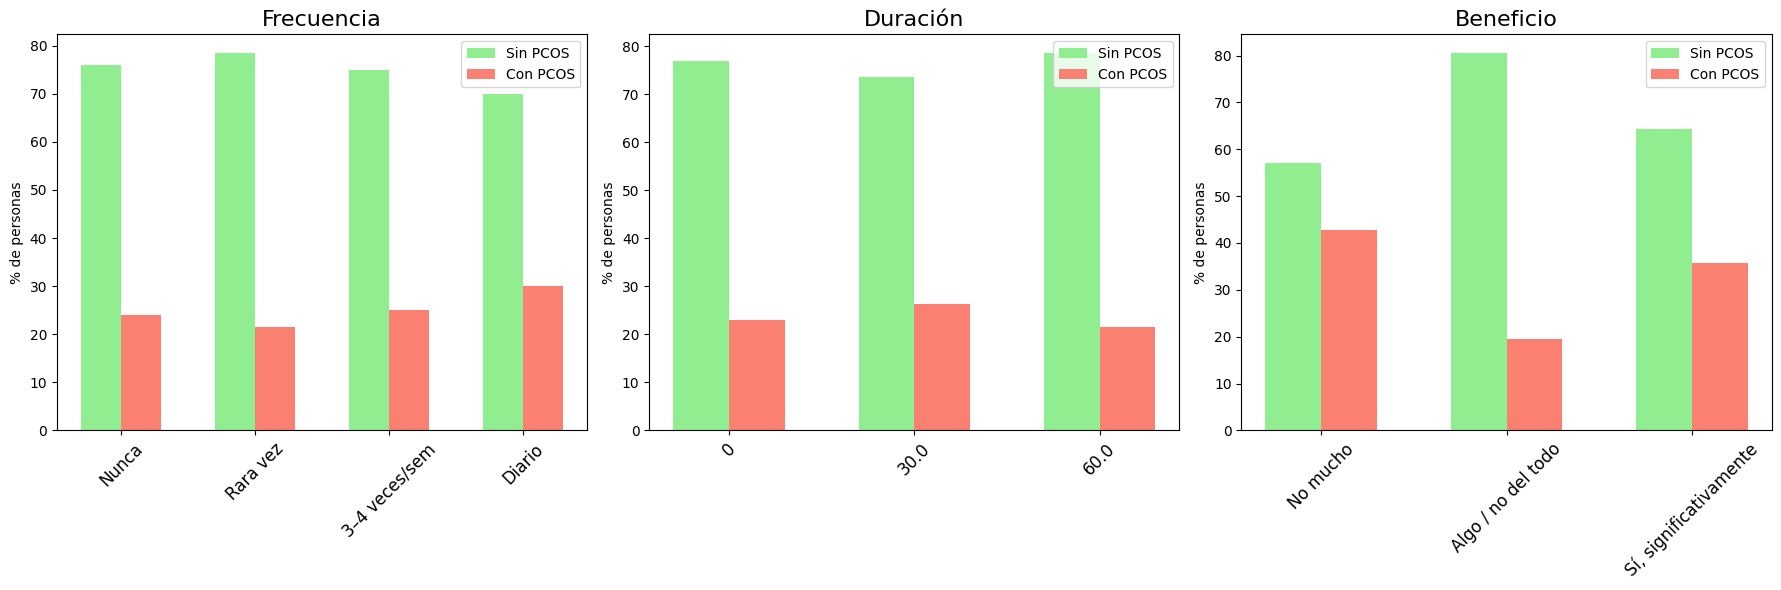

In [ ]:
#Crear gráfico de barras agrupadas
fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, data, title in zip(axes, [freq_df, dur_df, ben_df], ["Frecuencia", "Duración", "Beneficio"]):
    x = np.arange(len(data))
    ax.bar(x - 0.15, data[0], width=0.3, color='lightgreen', label='Sin PCOS')
    ax.bar(x + 0.15, data[1], width=0.3, color='salmon', label='Con PCOS')
    ax.set_xticks(x)
    ax.set_xticklabels(data.index, rotation=45, fontsize=12)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel("% de personas")
    ax.legend()

plt.tight_layout()
plt.show()